In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
working_dir = "/Users/emre/GitHub/HU-AI/AIN313/Assignment 2"
DATASET_PATH = os.path.join(working_dir, "dataset")
RAW_DATASET_PATH = os.path.join(DATASET_PATH, 'raw')
PROCESSED_DATASET_PATH = os.path.join(DATASET_PATH, 'processed')
GRAPH_PATH = os.path.join(working_dir, 'graphs')
CLASSES_PATH = os.path.join(RAW_DATASET_PATH, 'RIT_18', 'classes.npy')
TRAIN_DATA_PATH = os.path.join(RAW_DATASET_PATH, 'RIT_18', 'train_data.npy')
TRAIN_MASK_PATH = os.path.join(RAW_DATASET_PATH, 'RIT_18', 'train_mask.npy')
TRAIN_LABEL_PATH = os.path.join(RAW_DATASET_PATH, 'RIT_18', 'train_labels.npy')

In [3]:
classes = np.load(CLASSES_PATH)
train_data = np.load(TRAIN_DATA_PATH)
train_mask = np.load(TRAIN_MASK_PATH)
train_labels = np.load(TRAIN_LABEL_PATH)

In [4]:
classes

array(['0. Other Class/Image Border',
       '1. Road Markings, Asphalt, Landing Pad', '2. Water',
       '3. Building', '4. Vehicle (Car, Truck, or Bus)', '5. Person',
       '6. Vegetation', '7. Wood Panel', '8. Rocks, Sand',
       '9. Chair, Table'], dtype='<U38')

In [5]:
print(f"Train data shape: {train_data.shape}")
print(f"Train mask shape: {train_mask.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train data shape: (9393, 5642, 6)
Train mask shape: (9393, 5642)
Train labels shape: (9393, 5642)


In [6]:
# Assuming 'train_data' contains the multispectral image with six VNIR spectral bands
variances = np.var(train_data, axis=(0, 1))

# sort the variances in descending order
# variances = np.sort(variances)[::-1]

# Print the indices and variances of the bands
for i, variance in enumerate(variances):
    print(f'Band {i + 1}: Variance = {variance}')

Band 1: Variance = 3257446.812378488
Band 2: Variance = 4718684.562276045
Band 3: Variance = 1858510.4290385991
Band 4: Variance = 7196513.115477431
Band 5: Variance = 11632590.502634317
Band 6: Variance = 8189062.885597979


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


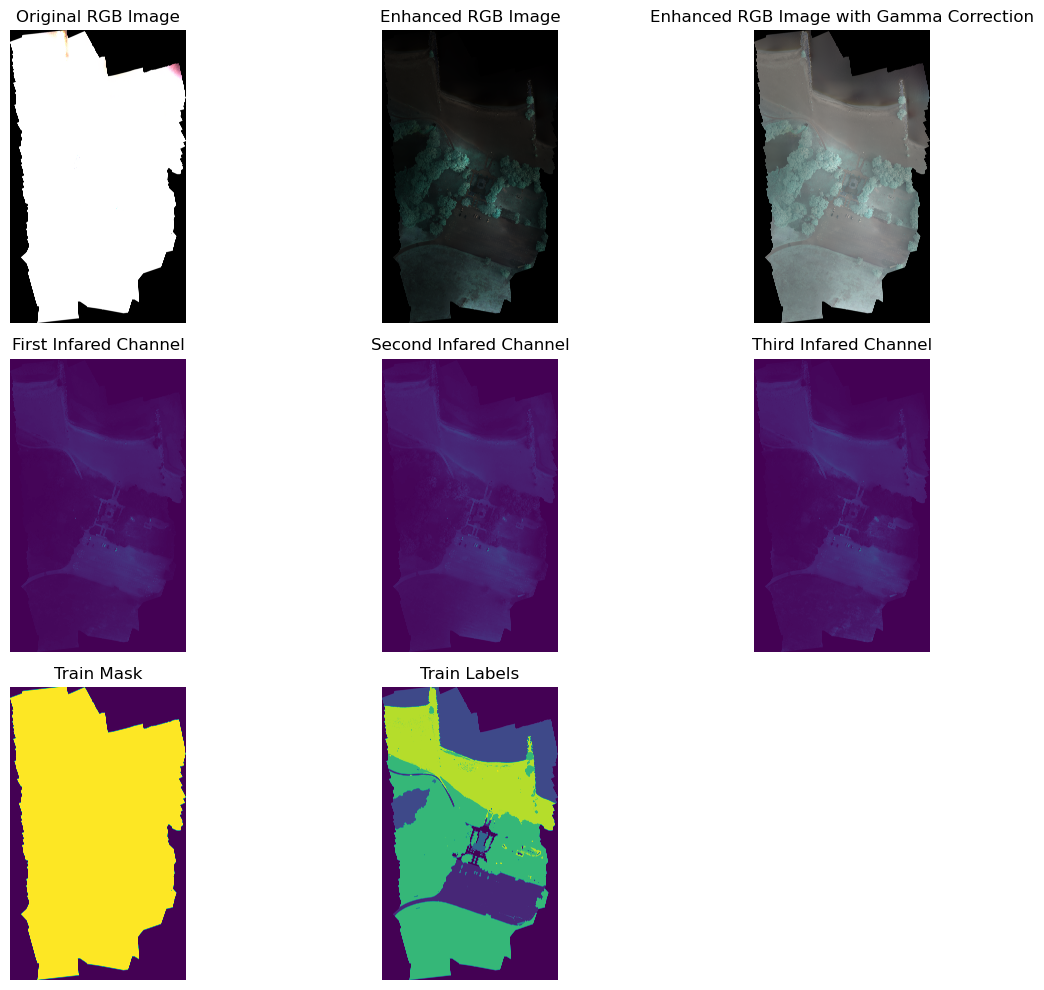

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train_data' contains the multispectral image with six VNIR spectral bands

# Extract the most informative three spectral bands for RGB
rgb_image = train_data[:, :, 3:]

# Normalize pixel values to the range [0, 1] for each channel independently
rgb_image_normalized = (rgb_image - np.min(rgb_image, axis=(0, 1))) / (np.max(rgb_image, axis=(0, 1)) - np.min(rgb_image, axis=(0, 1)))

# Apply gamma correction for brightness enhancement
gamma = 3.2
rgb_image_normalized_gamma = np.power(rgb_image_normalized, 1/gamma)

# Display the original and enhanced RGB images side by side
plt.figure(figsize=(12, 10))

# Original RGB Image
plt.subplot(3, 3, 1)
plt.imshow(rgb_image)
plt.title('Original RGB Image')
plt.axis('off')  # Hide the axis ticks

# Enhanced RGB Image
plt.subplot(3, 3, 2)
plt.imshow(rgb_image_normalized)
plt.title('Enhanced RGB Image')
plt.axis('off')  # Hide the axis ticks

# Display the enhanced RGB image with gamma correction
plt.subplot(3, 3, 3)
plt.imshow(rgb_image_normalized_gamma)
plt.title('Enhanced RGB Image with Gamma Correction')
plt.axis('off')  # Hide the axis ticks

# show first infared chanel
plt.subplot(3, 3, 4)
plt.imshow(train_data[:, :, 0])
plt.title('First Infared Channel')
plt.axis('off')  # Hide the axis ticks

# show second infared chanel
plt.subplot(3, 3, 5)
plt.imshow(train_data[:, :, 1])
plt.title('Second Infared Channel')
plt.axis('off')  # Hide the axis ticks

# show third infared chanel
plt.subplot(3, 3, 6)
plt.imshow(train_data[:, :, 2])
plt.title('Third Infared Channel')
plt.axis('off')  # Hide the axis ticks

# show masks
plt.subplot(3, 3, 7)
plt.imshow(train_mask)
plt.title('Train Mask')
plt.axis('off')  # Hide the axis ticks

# show labels
plt.subplot(3, 3, 8)
plt.imshow(train_labels)
plt.title('Train Labels')
plt.axis('off')  # Hide the axis ticks

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(GRAPH_PATH, '01-data-with-channels.png'))
plt.show()

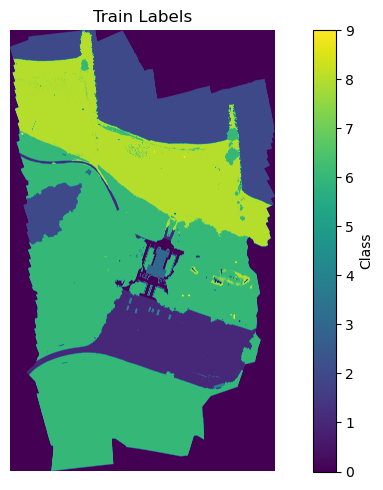

In [8]:
# show train_labels and add colorbar
# Display the original and enhanced RGB images side by side
plt.figure(figsize=(8, 5))
plt.imshow(train_labels)

# Use class indices as ticks
ticks = np.arange(len(classes))

# Set class names as tick labels
plt.colorbar(ticks=ticks, label='Class')

plt.title('Train Labels')
plt.axis('off')  # Hide the axis ticks
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(GRAPH_PATH, '02-train-labels.png'))
plt.show()

In [9]:
unique, count = np.unique(train_mask, return_counts=True)

for i, (u, c) in enumerate(zip(unique, count)):
    print(f"Class {u}: {c} pixels")

Class 0: 13273841 pixels
Class 65535: 39721465 pixels


In [10]:
classes_dict = {
    '0': 'Other Class/Image Border',
    '1': 'Road Markings, Asphalt, Landing Pad',
    '2': 'Water',
    '3': 'Building',
    '4': 'Vehicle (Car, Truck, or Bus)',
    '5': 'Person',
    '6': 'Vegetation',
    '7': 'Wood Panel',
    '8': 'Rocks, Sand',
    '9': 'Chair, Table'
}

In [11]:
unique, count = np.unique(train_labels, return_counts=True)

for i, (u, c) in enumerate(zip(unique, count)):
    # print(classes_dict[str(u)])
    print(f'Class {u} -> {classes_dict[str(u)]}: {c} pixels')

Class 0 -> Other Class/Image Border: 13782516 pixels
Class 1 -> Road Markings, Asphalt, Landing Pad: 4537675 pixels
Class 2 -> Water: 7409126 pixels
Class 3 -> Building: 177727 pixels
Class 4 -> Vehicle (Car, Truck, or Bus): 43915 pixels
Class 5 -> Person: 1635 pixels
Class 6 -> Vegetation: 18594492 pixels
Class 7 -> Wood Panel: 2144 pixels
Class 8 -> Rocks, Sand: 8432636 pixels
Class 9 -> Chair, Table: 13440 pixels


In [12]:
# Extract the most informative three spectral bands for RGB
rgb_image = train_data[:, :, 3:]

# Normalize pixel values to the range [0, 1] for each channel independently
rgb_image_normalized = (rgb_image - np.min(rgb_image, axis=(0, 1))) / (np.max(rgb_image, axis=(0, 1)) - np.min(rgb_image, axis=(0, 1)))

# Set the percentage for the test split
test_split_percentage = 30

# Calculate the index to split the data
split_index = int((test_split_percentage / 100) * rgb_image_normalized.shape[1])
# print(f'Split index: {split_index}')

# Split the data into training and testing sets
train_rgb = rgb_image_normalized[:, :-split_index, :]
test_rgb = rgb_image_normalized[:, -split_index:, :]

# save them to disk as npy file
np.save(os.path.join(PROCESSED_DATASET_PATH, 'train_rgb.npy'), train_rgb)
np.save(os.path.join(PROCESSED_DATASET_PATH, 'test_rgb.npy'), test_rgb)

# Display the shape of the training and testing sets
print(f'Train RGB shape: {train_rgb.shape}')
print(f'Test RGB shape: {test_rgb.shape}')

Train RGB shape: (9393, 3950, 3)
Test RGB shape: (9393, 1692, 3)


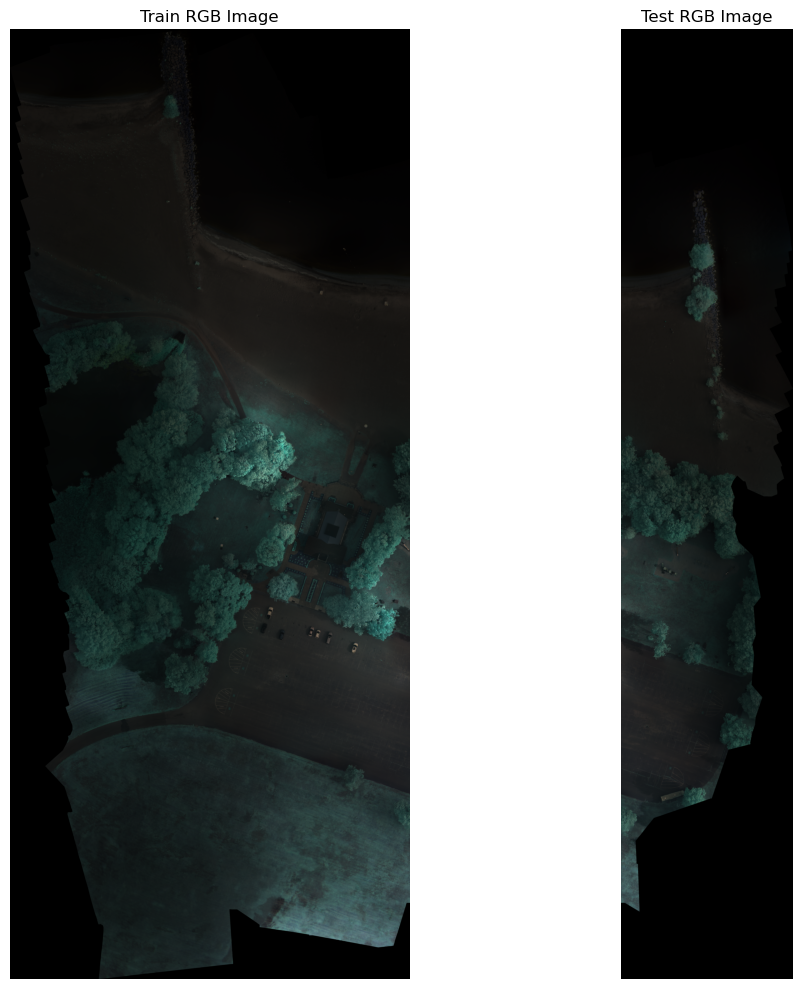

In [13]:
# show the train and test rgb images
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(train_rgb)
plt.title('Train RGB Image')
plt.axis('off')  # Hide the axis ticks

plt.subplot(1, 2, 2)
plt.imshow(test_rgb)
plt.title('Test RGB Image')
plt.axis('off')  # Hide the axis ticks


plt.tight_layout()
# save the figure
plt.savefig(os.path.join(GRAPH_PATH, '03-train-test-rgb.png'))
plt.show()


In [14]:
infra_image = train_data[:, :, :3]

# Normalize pixel values to the range [0, 1] for each channel independently
infra_image_normalized = (infra_image - np.min(infra_image, axis=(0, 1))) / (np.max(infra_image, axis=(0, 1)) - np.min(infra_image, axis=(0, 1)))

# Split the data into training and testing sets
train_infra = infra_image_normalized[:, :-split_index, :]
test_infra = infra_image_normalized[:, -split_index:, :]

# save them to disk as npy file
np.save(os.path.join(PROCESSED_DATASET_PATH, 'train_infra.npy'), train_infra)
np.save(os.path.join(PROCESSED_DATASET_PATH, 'test_infra.npy'), test_infra)

# Display the shape of the training and testing sets
print(f'Train Infra shape: {train_infra.shape}')
print(f'Test Infra shape: {test_infra.shape}')

Train Infra shape: (9393, 3950, 3)
Test Infra shape: (9393, 1692, 3)


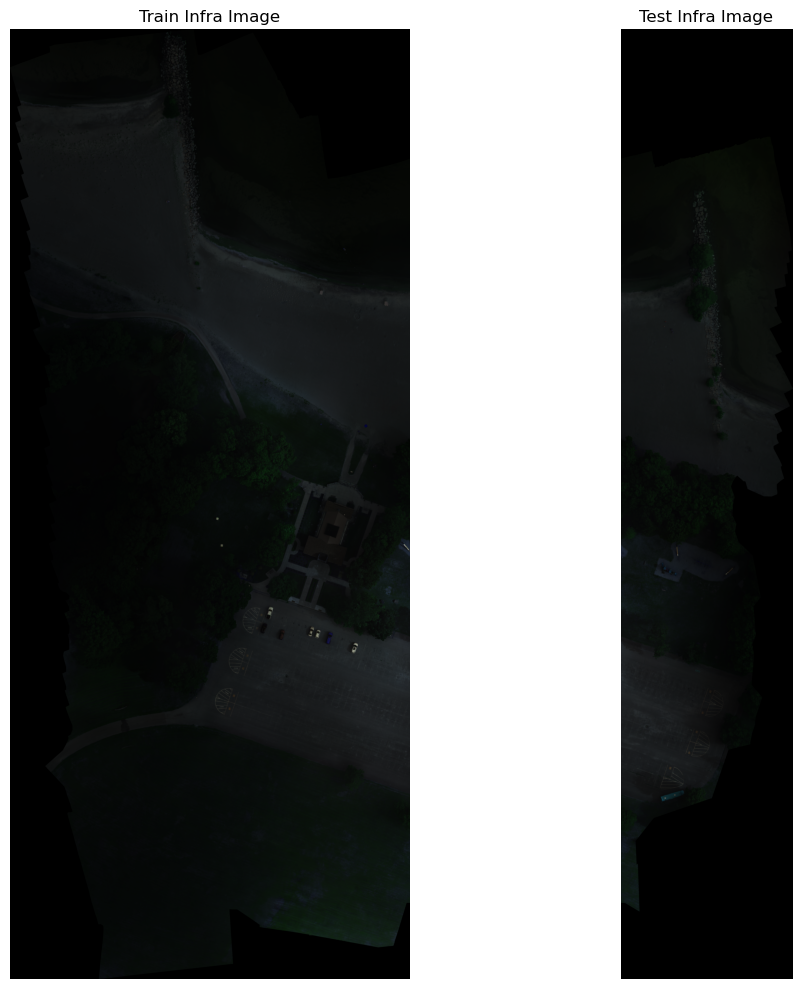

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(train_infra)
plt.title('Train Infra Image')
plt.axis('off')  # Hide the axis ticks

plt.subplot(1, 2, 2)
plt.imshow(test_infra)
plt.title('Test Infra Image')
plt.axis('off')  # Hide the axis ticks

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(GRAPH_PATH, '04-train-test-infra.png'))
plt.show()

In [16]:
whole_image = train_data

# Normalize pixel values to the range [0, 1] for each channel independently
whole_image_normalized = (whole_image - np.min(whole_image, axis=(0, 1))) / (np.max(whole_image, axis=(0, 1)) - np.min(whole_image, axis=(0, 1)))

# Split the data into training and testing sets
train_whole = whole_image_normalized[:, :-split_index, :]
test_whole = whole_image_normalized[:, -split_index:, :]

# save them to disk as npy file
np.save(os.path.join(PROCESSED_DATASET_PATH, 'train_whole.npy'), train_whole)
np.save(os.path.join(PROCESSED_DATASET_PATH, 'test_whole.npy'), test_whole)

# Display the shape of the training and testing sets
print(f'Train Whole shape: {train_whole.shape}')
print(f'Test Whole shape: {test_whole.shape}')

Train Whole shape: (9393, 3950, 6)
Test Whole shape: (9393, 1692, 6)


In [17]:
train_labels_divided = train_labels[:, :-split_index]
test_labels = train_labels[:, -split_index:]

# Set the percentage for the test split
test_split_percentage = 30

# Calculate the index to split the data
split_index = int((test_split_percentage / 100) * train_labels.shape[1])
# print(f'Split index: {split_index}')

# save them to disk as npy file
np.save(os.path.join(PROCESSED_DATASET_PATH, 'train_labels.npy'), train_labels_divided)
np.save(os.path.join(PROCESSED_DATASET_PATH, 'test_labels.npy'), test_labels)

# Display the shape of the training and testing sets
print(f'Train Labels shape: {train_labels_divided.shape}')
print(f'Test Labels shape: {test_labels.shape}')

Train Labels shape: (9393, 3950)
Test Labels shape: (9393, 1692)


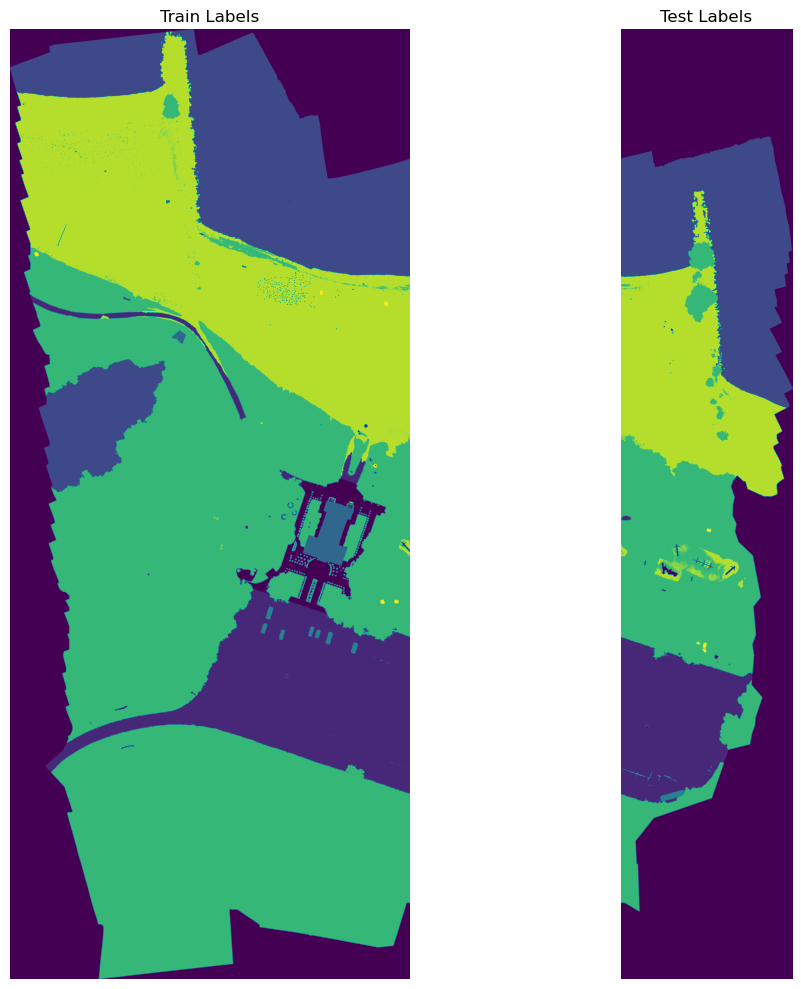

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(train_labels_divided)
plt.title('Train Labels')
plt.axis('off')  # Hide the axis ticks

plt.subplot(1, 2, 2)
plt.imshow(test_labels)
plt.title('Test Labels')
plt.axis('off')  # Hide the axis ticks

plt.tight_layout()
# save the figure
plt.savefig(os.path.join(GRAPH_PATH, '05-train-test-labels.png'))